### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Introduction**: explaining the problem and de fundamental concepts.
- **Excercise 07.01**: explained how I included the tail correction to the code of the previous excercise
- **Excercise 07.02**: 
    1. showing the solid, liquid, and gas phase autocorrelation as a function of the steps taken.
    2.  showing the solid, liquid, and gas phase standard deviation as a function of the steps taken.
- **Excercise 07.04**: 
    1. showing the pair distribution function for the three phases obtained with Monte Carlo and Molecular Dynamic simulations
    2. showing the pressure and internal energies for the three phases as a function of the number of blocks




In [24]:
# fundamental packages and constants
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

k_b = 1.380649 * 10**(-23) #(J/K)
epsilon = 120 * k_b  #(joule)
sigma_const = 0.34 * 10**(-9) #(m)

# Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_07.2' and 'es_07.3' the command :  `make`. 
- To automatically execute the code run :  `make run`.
- To clear the files `.o`  please run `make clean`.
- The code generates output files in the 'output' directory.
    - Inside the 'output' directory, you will find subdirectories for different phases: 'gas_simulation', 'liquid_simulation', and 'solid_simulation'.
    - These directories contain input files specific to the respective phase.
    - Within each phase's directory, you will find further divisions between Molecular Dynamics simulations (MD) and Monte Carlo simulations (MC).
- Please mind that running the code takes quite some time.
   

## Escercise 07.1
Computer simulations frequently use a potential with a spherical cutoff at a distance rc. It becomes useful to correct the results of simulations to compensate for the missing long-range part of the potential. To estimate the correction we consider that for radii greater than the cut-off radius the pair distribution function is equal to 1. 
The tail correction for the internal energy is 
$$
\frac{\langle w_\text{LJ}\rangle_\text{tail}}{3N\epsilon}=8\pi\rho_\text{LJ}\left[\frac 1{9r_{c\text{(LJ)}}^9}-\frac 1{6r_{c\text{(LJ)}}^3} \right].
$$

The tail correction for the pressure is 
$$
\frac{\langle w_\text{LJ}\rangle_\text{tail}}{3N\epsilon}=32\pi\rho_\text{LJ}\left[\frac 1{9r_{c\text{(LJ)}}^9}-\frac 1{6r_{c\text{(LJ)}}^3} \right].
$$

In the following simulations the tail correction are accounted for.

## Excercise 07.2
### 1.

For the gas, the delta that defines the sampling interval is 15 (in LJ units), for the solid, it's 0.26, and for the liquid, it's 0.12. 

The autocorrelation function is defined as
$$
Ac_\text{[x]}(\tau)=\frac{\langle x(t)x(t+\tau)\rangle-\langle x(t)\rangle \langle x(t+\tau)\rangle}{\sigma_x^2}
$$

In [25]:
def autocorrelation(x, tau, t_max):
    sum1, sum2, sum3, sum4, sum5 = 0, 0, 0, 0, 0

    for t in range(t_max - tau):
        x_t = x[t]
        x_t_plus_tau = x[t + tau]

        sum1 += x_t * x_t_plus_tau
        sum2 += x_t
        sum3 += x_t_plus_tau

    for t in range(t_max):
        x_t = x[t]
        sum4 += x_t * x_t
        sum5 += x_t

    num = (sum1 / (t_max - tau)) - ((sum2 / (t_max - tau)) * (sum3 / (t_max - tau)))
    den = (sum4 / t_max) - ((sum5 / t_max) ** 2)

    return num / den


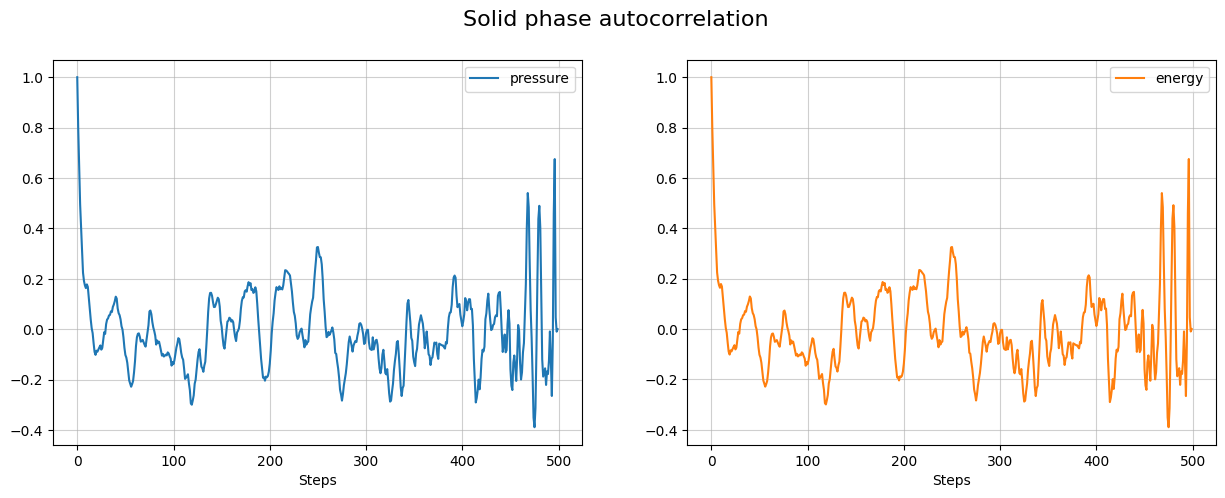

In [26]:
tmax = 500
t = np.arange( tmax )

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

p_solid = np.loadtxt("es_07.2/solid_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u_solid = np.loadtxt("es_07.2/solid_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)

autocorrelation_p_liq = [autocorrelation(p_solid, i, tmax) for i in range(tmax)]
autocorrelation_e_liq = [autocorrelation(u_solid, i, tmax) for i in range(tmax)]

for i, autocorrelation_data in enumerate([autocorrelation_p_liq, autocorrelation_e_liq]):
    ax[i].plot(t, autocorrelation_data, color=cm(2 * i),label=labels[i])
    ax[i].legend()
    ax[i].set_xlabel("Steps")
    ax[i].grid(alpha=0.6)

fig.suptitle('Solid phase autocorrelation', fontsize=16)

plt.show()

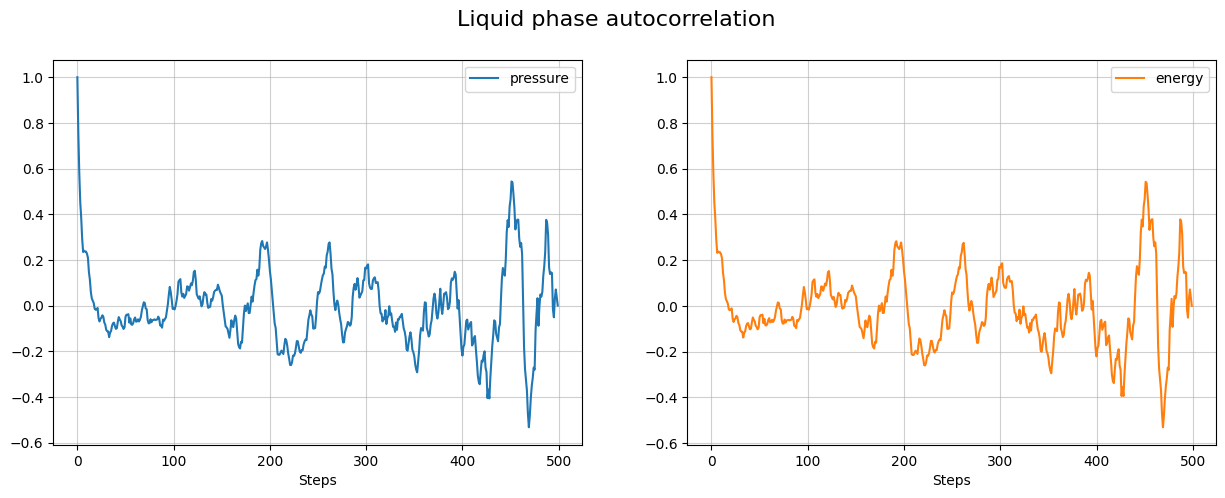

In [27]:
tmax = 500
t = np.arange( tmax )

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

p_liquid = np.loadtxt("es_07.2/liquid_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u_liquid = np.loadtxt("es_07.2/liquid_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)

autocorrelation_p_liq = [autocorrelation(p_liquid, i, tmax) for i in range(tmax)]
autocorrelation_e_liq = [autocorrelation(u_liquid, i, tmax) for i in range(tmax)]

for i, autocorrelation_data in enumerate([autocorrelation_p_liq, autocorrelation_e_liq]):
    ax[i].plot(t, autocorrelation_data, color=cm(2 * i),label=labels[i])
    ax[i].legend()
    ax[i].set_xlabel("Steps")
    ax[i].grid(alpha=0.6)

fig.suptitle('Liquid phase autocorrelation', fontsize=16)

plt.show()


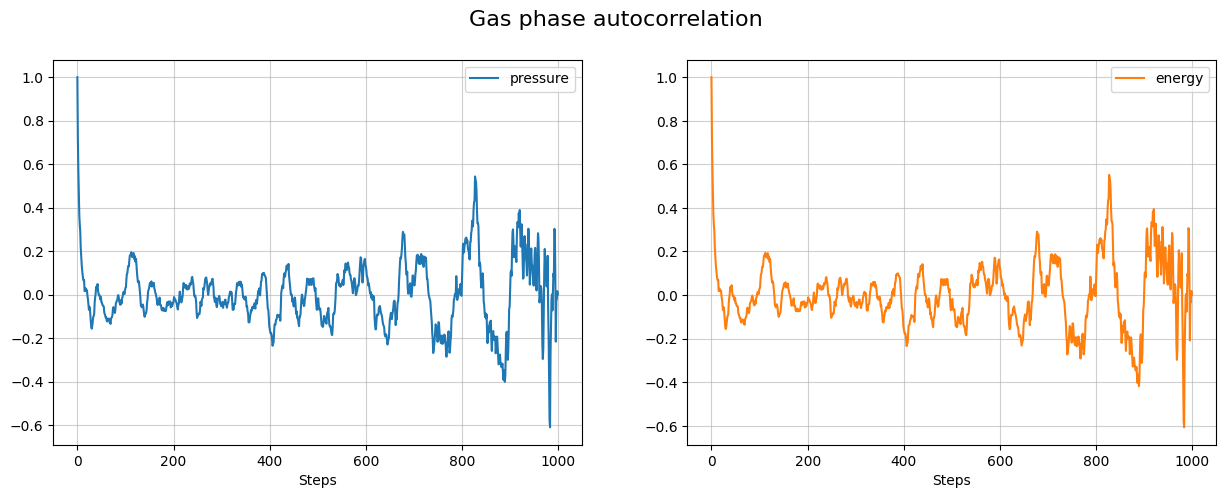

In [28]:
tmax = 1000
t = np.arange( tmax )


fig, ax = plt.subplots(1, 2, figsize=(15, 5))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

p_gas = np.loadtxt("es_07.2/gas_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u_gas = np.loadtxt("es_07.2/gas_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)

autocorrelation_p_liq = [autocorrelation(p_gas, i, tmax) for i in range(tmax)]
autocorrelation_e_liq = [autocorrelation(u_gas, i, tmax) for i in range(tmax)]

for i, autocorrelation_data in enumerate([autocorrelation_p_liq, autocorrelation_e_liq]):
    ax[i].plot(t, autocorrelation_data, color=cm(2 * i),label=labels[i])
    ax[i].legend()
    ax[i].set_xlabel("Steps")
    ax[i].grid(alpha=0.6)

fig.suptitle('Gas phase autocorrelation', fontsize=16)

plt.show()

The correlation time measures the time it takes for the system to evolve into a significantly different state from its current one. As expected, the autocorrelations in pressure and energy are significant for the fist steps and decay exponentially as time increases.

Correlations for the gaseous system decay much more rapidly than in the other cases. This happens because in the Monte Carlo step, the sampling interval for the new position is much larger, making it easier for the system to explore new configurations. In all three cases, correlations are lost after 100 time steps. We take this into account when choosing the block size.

### 2.


In [29]:
import numpy as np

def error(sum_prog, sum_prog2, N):
    if N == 0:
        return 0
    var = (sum_prog2[N] - sum_prog[N]**2) / N
    return var**(1/2)

def sigma(p, blocks):
    L = int(500000 / blocks)
    sum_prog = np.zeros(blocks)
    sum_prog_2 = np.zeros(blocks)
    errors = np.zeros(blocks)
    
    for i in range(blocks):
        s = np.sum(p[i * L:(i + 1) * L]) / L

        if i == 0:
            sum_prog[i] = s
            sum_prog_2[i] = s**2
        else:
            sum_prog[i] = sum_prog[i - 1] + s
            sum_prog_2[i] = sum_prog_2[i - 1] + s**2
    
    for i in range(blocks):
        sum_prog[i] /= (i + 1)
        sum_prog_2[i] /= (i + 1)
        errors[i] = error(sum_prog, sum_prog_2, i)

    return errors[-1]


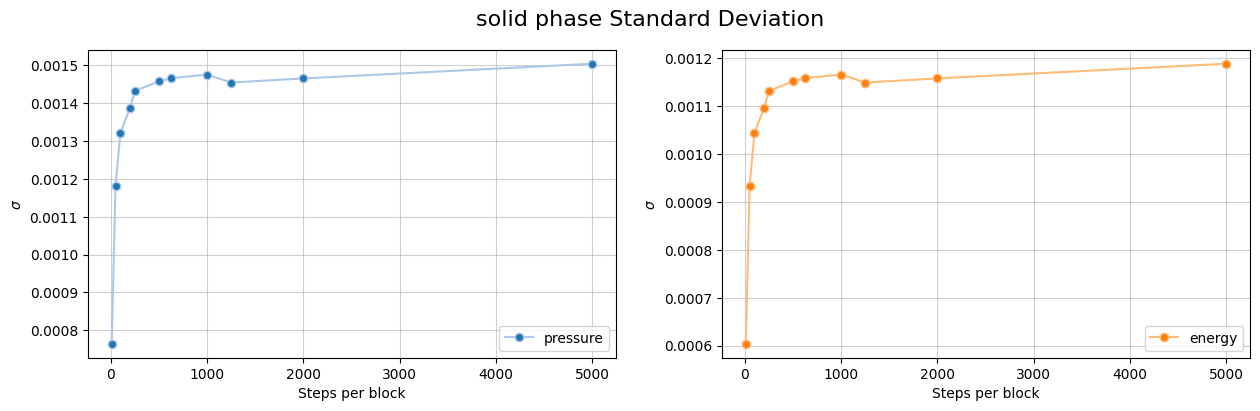

In [30]:
import matplotlib.pyplot as plt
import numpy as np

blocchi = np.array([50000, 10000, 5000, 2500, 2000, 1000, 800, 500, 400, 250, 100], dtype=int)
L = 5e5 / blocchi

state = 'solid'

p = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)
errors_p = [sigma(p, blocchi[i]) for i in range(len(blocchi))]
errors_e = [sigma(u, blocchi[i]) for i in range(len(blocchi))]

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

for i, error_data in enumerate([errors_p, errors_e]):
    ax[i].plot(L, error_data,   marker='o',markerfacecolor=cm(2*i), label=labels[i], color=cm(2*i+1))
    ax[i].set_xlabel('Steps per block')
    ax[i].set_ylabel(r'$\sigma$')
    ax[i].legend()
    ax[i].grid(alpha=0.6)


fig.suptitle(state+ ' phase Standard Deviation', fontsize=16)

plt.show()

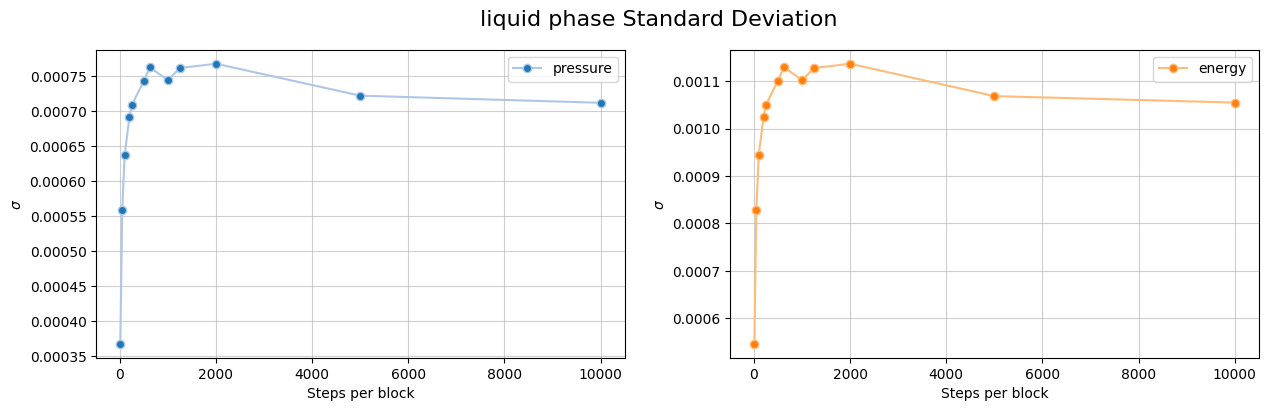

In [31]:
import matplotlib.pyplot as plt
import numpy as np

blocchi = np.array([50000, 10000, 5000, 2500, 2000, 1000, 800, 500, 400, 250, 100,50], dtype=int)
L = 5e5 / blocchi

state = 'liquid'

p = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)
errors_p = [sigma(p, blocchi[i]) for i in range(len(blocchi))]
errors_e = [sigma(u, blocchi[i]) for i in range(len(blocchi))]

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

for i, error_data in enumerate([errors_p, errors_e]):
    ax[i].plot(L, error_data,   marker='o',markerfacecolor=cm(2*i), label=labels[i], color=cm(2*i+1))
    ax[i].set_xlabel('Steps per block')
    ax[i].set_ylabel(r'$\sigma$')
    ax[i].legend()
    ax[i].grid(alpha=0.6)


fig.suptitle(state+ ' phase Standard Deviation', fontsize=16)

plt.show()

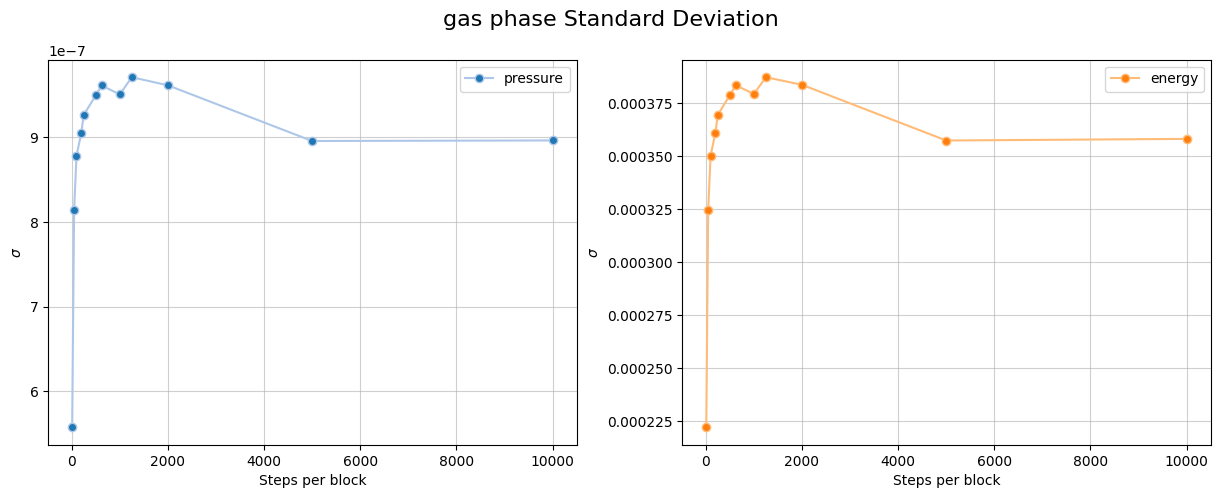

In [32]:
import matplotlib.pyplot as plt
import numpy as np

blocchi = np.array([50000, 10000, 5000, 2500, 2000, 1000, 800, 500, 400, 250, 100,50], dtype=int)
L = 5e5 / blocchi

state = 'gas'

p = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_pressure.dat", dtype=float, usecols=(0), unpack=True)
u = np.loadtxt("es_07.2/"+state+"_simulation/MC/instant_energy.dat", dtype=float, usecols=(0), unpack=True)
errors_p = [sigma(p, blocchi[i]) for i in range(len(blocchi))]
errors_e = [sigma(u, blocchi[i]) for i in range(len(blocchi))]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
labels = ["pressure", "energy"]
cm = plt.get_cmap('tab20')

for i, error_data in enumerate([errors_p, errors_e]):
    ax[i].plot(L, error_data,   marker='o',markerfacecolor=cm(2*i), label=labels[i], color=cm(2*i+1))
    ax[i].set_xlabel('Steps per block')
    ax[i].set_ylabel(r'$\sigma$')
    ax[i].legend()
    ax[i].grid(alpha=0.6)


fig.suptitle(state+ ' phase Standard Deviation', fontsize=16)

plt.show()


The statistical uncertainty increases proportionally with the block size. This behavior is in complete alignment with our expectations. In smaller blocks, measurements display significant correlations, leading to an underestimation of statistical uncertainty. As the block size grows, the uncertainty also increases until it eventually saturates. At this point, the measurements are largely uncorrelated, signifying the appropriate selection of block size.

It's also worth noting that employing excessively large blocks is redundant. Across all three systems, uncertainties reach a saturation point with just 1000 steps per block, rendering further enlargement of blocks unnecessary.

Further simulations considers 50 blocks made of 2000 steps. The number of thermalization steps is also 2000 for every state.

## Excercise 07.4

To obtain the pair distribution function during the simulation, we filled an histogram by increasing the bin by 2 at $r$ whenever we found two particles at
distance between $r$ and $r+dr$. At the end of the simulation we normalize the histogram with $\rho N\Delta V(r)$ .

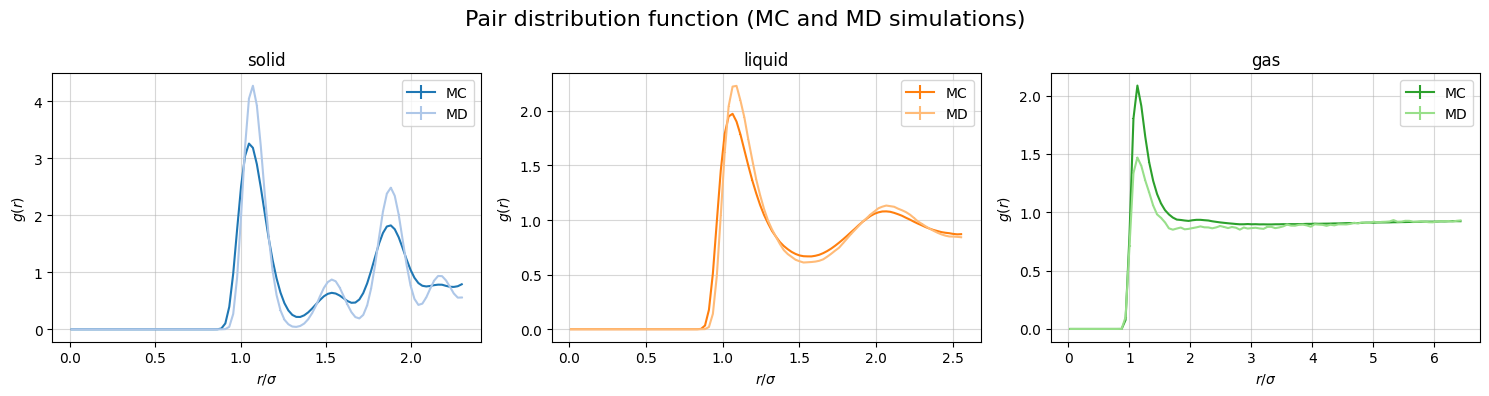

In [33]:
import numpy as np
import matplotlib.pyplot as plt

simulations = ["MC", "MD"]
states = ['solid', 'liquid', 'gas']
rho = [1.1, 0.8, 0.05]

cm = plt.get_cmap('tab20')

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, state in enumerate(states):
    for j, simulation in enumerate(simulations):
        gr, errors = np.loadtxt(f"es_07.3/{state}_simulation/{simulation}/output_g.dat", dtype=float, delimiter=',', usecols=(0, 1), unpack=True)
        binsize = (108 / rho[i]) ** (1 / 3) / 200.
        bins = np.arange(start=binsize / 2., stop=binsize * (0.5 + 100), step=binsize)
        ax[i].errorbar(bins[:len(gr)], gr, yerr=errors, color=cm(2 * i+j), label=simulation)
    
    ax[i].set_xlabel(r'$r / \sigma $')
    ax[i].set_ylabel(r'$g(r)$')
    ax[i].set_title(state, fontsize=12)
    ax[i].grid(alpha=0.5)
    ax[i].legend()

fig.suptitle('Pair distribution function (MC and MD simulations)', fontsize=16)
plt.tight_layout()
plt.show()


1. The solid material displays a well-defined ordered lattice structure. This is evident in the pair distribution function, where a prominent peak corresponds to nearest neighbors, and subsequent smaller peaks are regularly spaced, indicating increasing neighbor distances within the crystalline lattice.

2. In the case of the liquid, the observed structure is more disordered compared to the solid. However, the pair distribution function still exhibits a discernible peak for nearest neighbors, although the intensity of subsequent peaks diminishes, signifying a less ordered arrangement of molecules.

3. For the gas phase, characterized by its disordered state, the pair distribution function maintains a peak for nearest neighbors. Interestingly, as the distance from the reference particle increases, the distribution gradually flattens out. 

When we compare the two algorithms for calculating the radial distribution functions, we see they generally agree, but there are some small differences. One noteworthy point is that the Verlet algorithm tends to have slightly higher data errors. This is because the Verlet algorithm is less stable in maintaining the simulation temperature. As a result, it needs fewer steps compared to the Monte Carlo algorithm, which is more stable and doesn't suffer from temperature fluctuations. Surprisingly, despite the fewer steps, the agreement between the two methods is still quite good.

### SOLID SIMULATION


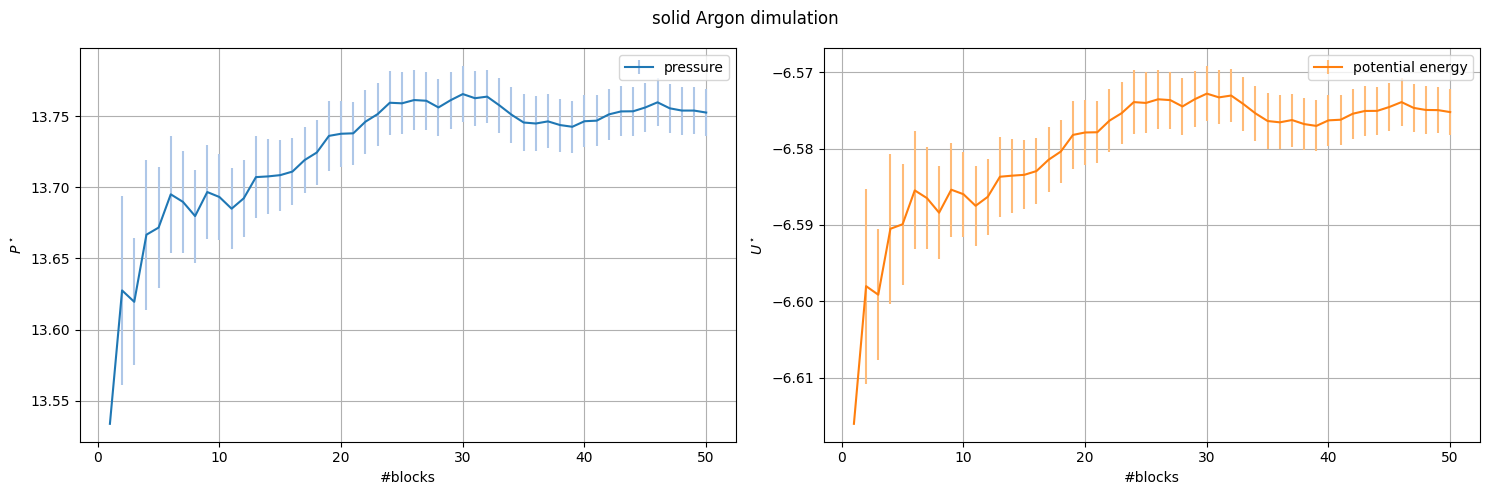

In [34]:

import numpy as np
import matplotlib.pyplot as plt

state ='solid'
method = 'MC'

# Import data formatted as tables from .txt files
data = {
    'potential energy': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_epot.dat'),#, dtype=float, delimiter=',', usecols=(0, 2), unpack=True),
    'pressure': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_pres.dat')#, dtype=float, delimiter=',', usecols=(0, ), unpack=True)
}

L = 2000  # Block size

quantities = ['pressure', 'potential energy']

ylabels = [ r'$P^\star$', r'$U^\star$' ]

cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
axs = ax.flatten()

# Plot the data
for i in range(2):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot

# Set titles and adjust subplot spacing
fig.suptitle(state+" Argon dimulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.3, hspace=0.24)

# Show the plot
plt.show()


### LIQUID SIMULATION

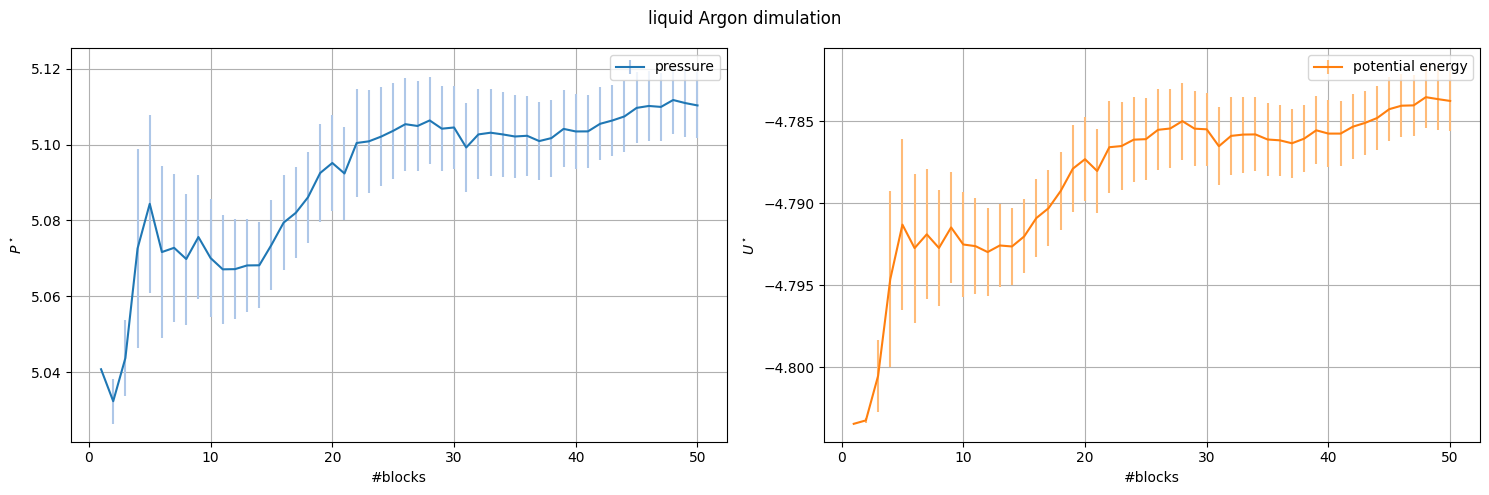

In [35]:
import numpy as np
import matplotlib.pyplot as plt

state ='liquid'
method = 'MC'

# Import data formatted as tables from .txt files
data = {
    'potential energy': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_epot.dat'),#, dtype=float, delimiter=',', usecols=(0, 2), unpack=True),
    'pressure': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_pres.dat')#, dtype=float, delimiter=',', usecols=(0, ), unpack=True)
}

L = 2000  # Block size

quantities = ['pressure', 'potential energy']

ylabels = [ r'$P^\star$', r'$U^\star$' ]

cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
axs = ax.flatten()

# Plot the data
for i in range(2):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot

# Set titles and adjust subplot spacing
fig.suptitle(state+" Argon dimulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.3, hspace=0.24)

# Show the plot
plt.show()

### GAS SIMULATION

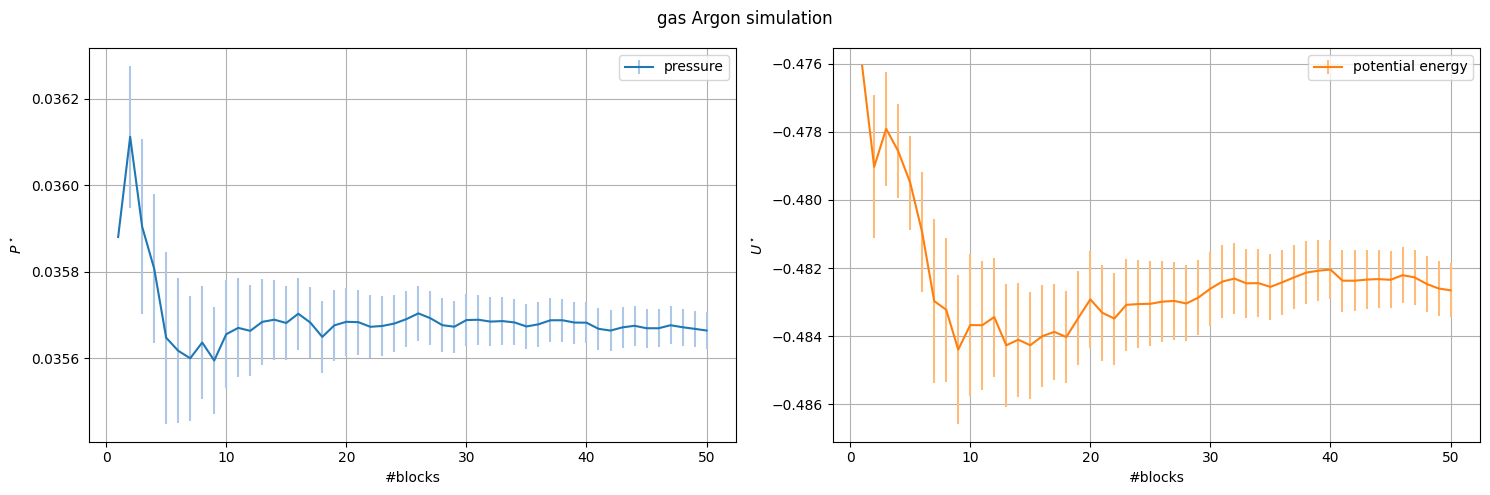

In [36]:
import numpy as np
import matplotlib.pyplot as plt

state ='gas'
method = 'MC'

# Import data formatted as tables from .txt files
data = {
    'potential energy': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_epot.dat'),#, dtype=float, delimiter=',', usecols=(0, 2), unpack=True),
    'pressure': np.loadtxt('es_07.3/'+state+'_simulation/'+method+'/output_pres.dat')#, dtype=float, delimiter=',', usecols=(0, ), unpack=True)
}

L = 2000  # Block size

quantities = ['pressure', 'potential energy']

ylabels = [ r'$P^\star$', r'$U^\star$' ]

cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
axs = ax.flatten()

# Plot the data
for i in range(2):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot

# Set titles and adjust subplot spacing
fig.suptitle(state+" Argon simulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.3, hspace=0.24)

# Show the plot
plt.show()

The Monte Carlo simulations in the canonical ensemble were executed with a total of 100000, discretized into 50 blocks, each comprising 2000 steps. These specific parameters were selected taking into deep consideration the outcomes from the initial segments of this investigation. In those preliminary assessments, we ascertained the requisite block lengths essential for mitigating correlations within the data.

The pressure and internal energy results match the system's physical properties and agree with what we found in Notebook 4. 
